In [1]:
# Pandas for managing datasets
import pandas as pd
# Seaborn for plotting and styling
import seaborn as sns
sns.set_style("white")
import numpy as np
import matplotlib.pyplot as plt
#import hvplot.pandas


%matplotlib inline

import scipy.stats as stats
import statsmodels.api as sm

import scipy
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression


# PCA
import math
#from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [2]:
# Import dataset
df = pd.read_csv("/Users/nataliaagudelo/Desktop/Classes/thinkful/DataScienceBootCamp/Unit2/Metro_Interstate_Traffic_Volume.csv")
df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,9/30/18 19:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,9/30/18 20:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,9/30/18 21:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,9/30/18 22:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,9/30/18 23:00,954


In [3]:
df.shape;

In [4]:
df.isnull().sum();

In [5]:
df['date_time'] = pd.to_datetime(df.date_time);

In [6]:
df.dtypes;

In [7]:
df['Year'] = df.date_time.dt.year
df['Month'] = df.date_time.dt.month
df['Day'] = df.date_time.dt.day
df['Hour'] = df.date_time.dt.hour
df.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Year,Month,Day,Hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,2012,10,2,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,2012,10,2,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,2012,10,2,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,2012,10,2,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,2012,10,2,13


In [8]:
# date_time columns is reduntant after transformation, drop
df.drop("date_time", axis=1, inplace= True)

In [9]:
# Take a look at the data types to know how to manipulate them
df.dtypes;

# Exploring the Data

This dataset contains three categorical variables, six continuous variables and no missing data, as seen bellow. 


## Attribute Information

holiday : Categorical US National holidays plus regional holiday, Minnesota State Fair 
Temperature (temp): Numeric Average temp in kelvin 
Rain (rain_1h): Numeric Amount in mm of rain that occurred in the hour 
Snow (snow_1h): Numeric Amount in mm of snow that occurred in the hour 
Cloud coverage (clouds_all): Numeric Percentage of cloud cover 
Weather (weather_main): Categorical Short textual description of the current weather 
Weather_description: Categorical Longer textual description of the current weather 
date_time : DateTime Hour of the data collected in local CST time 
traffic_volume : Numeric Hourly I-94 ATR 301 reported westbound traffic volume

The latter is the outcome variable. In addition, weather_description inserts redundancy with litle extra information compared to weather_main, therefore, its droped from the dataset. 

In [10]:
# Drop weather description column
df.drop("weather_description", axis=1, inplace= True);

In [11]:
# None looks like a no data name, change to regular (regular day/no holiday)
df = df.replace({"holiday" :'None'},'Regular');

## Univariate Analysis


Explore the independent categorical variables

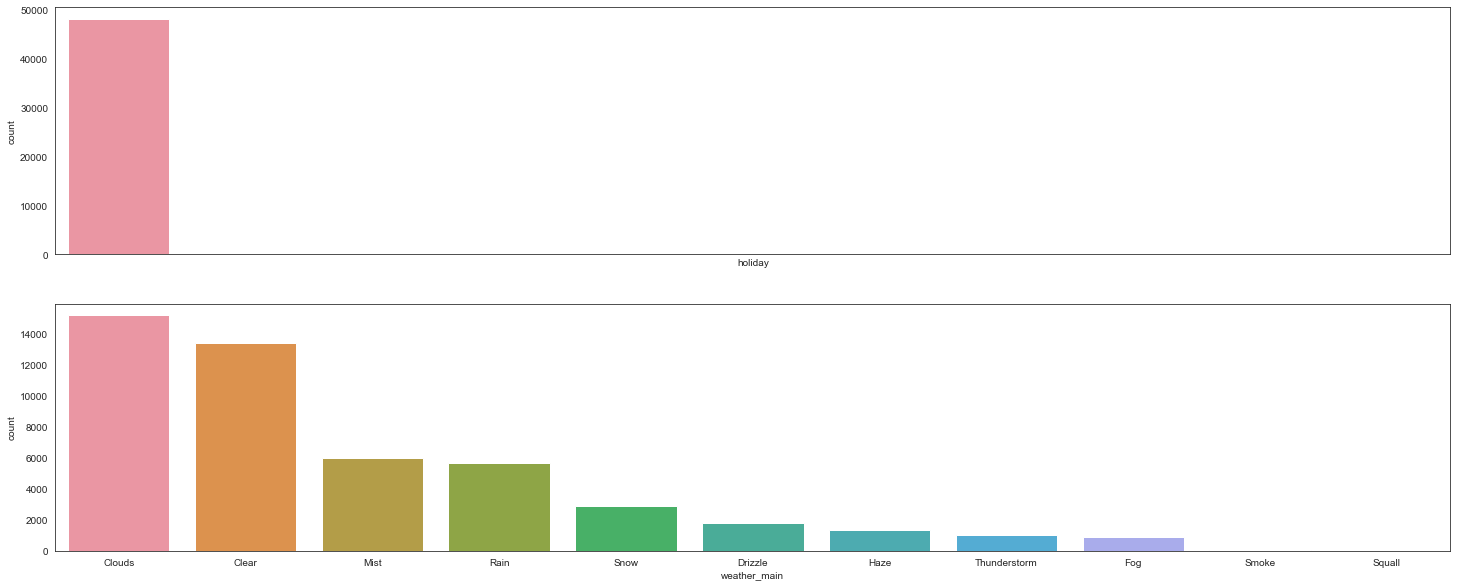

In [12]:
# visualizing ocurrance of holidays and weather
fig, ax = plt.subplots(2, 1, figsize=(25, 10), sharex=True)
sns.countplot(x="holiday", data=df, ax=ax[0])
sns.countplot(x ="weather_main", data=df, ax=ax[1], order=df['weather_main'].value_counts().index)
plt.show()

It is difficult to see the count of holidays due to the big count of regular days.

Visualize holidays only


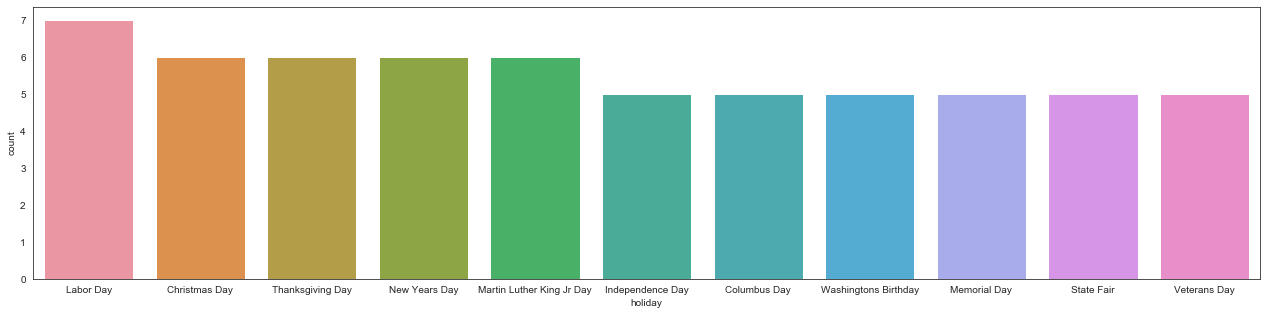

In [13]:
# Plot only holidays
df_holi = df[df.holiday != "Regular"]

plt.figure(figsize=(22, 5))
sns.countplot(x="holiday", data=df_holi, order=df_holi['holiday'].value_counts().index)
plt.show()

In [14]:
# Rename columns for easier access
df.rename({'rain_1h':'rain', 'snow_1h':'snow', 'clouds_all':'clouds', 'weather_main':'weather', 'traffic_volume' :'Target'}, axis=1, inplace=True);

In [15]:
# Make a dataframe of categorical variables
X_cate = df[['holiday', 'weather']];

In [16]:
# Make a dataframe of the numeric variables
X_nume = df.select_dtypes([np.int, np.float])

# leave target variable out
#X_nume = X_nume.drop('traffic_volume', axis=1);

In [17]:
#df["traffic_volume"].shape

In [18]:
#Y_target = df['traffic_volume'];

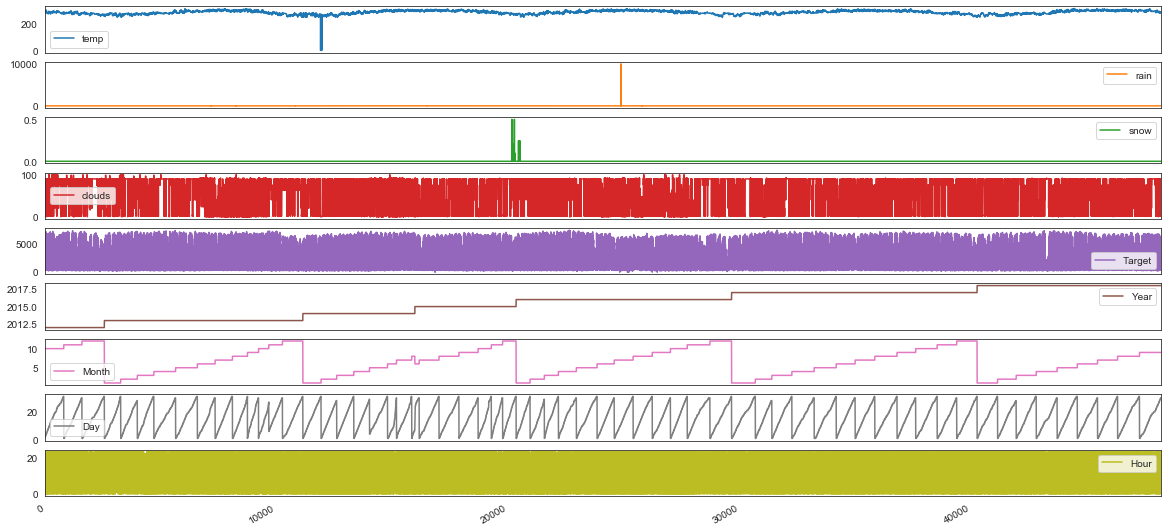

In [19]:
# Visualize numerical variables
X_nume.plot(subplots=True, figsize=(20, 10))
plt.show()

Look for the outliers you see in the graphs above and discard

In [20]:
# Look for outliers in temperature
X_nume['temp'].describe()

count    48204.000000
mean       281.205870
std         13.338232
min          0.000000
25%        272.160000
50%        282.450000
75%        291.806000
max        310.070000
Name: temp, dtype: float64

This data is in Kelving and it can not be a -459.67 Fahrenheits in Minnesota

In [21]:
# Look for outliers in temperature
X_nume[(X_nume['temp'] == 0)].count()

temp      10
rain      10
snow      10
clouds    10
Target    10
Year      10
Month     10
Day       10
Hour      10
dtype: int64

In [22]:
# Look for outliers in rain
X_nume['rain'].describe()

count    48204.000000
mean         0.334264
std         44.789133
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       9831.300000
Name: rain, dtype: float64

9831mm of rain compared to 0.33mm mean rain its probably a typo

In [23]:
# Look for outliers in rain
X_nume[(X_nume['rain'] > 9000)].count()

temp      1
rain      1
snow      1
clouds    1
Target    1
Year      1
Month     1
Day       1
Hour      1
dtype: int64

In [24]:
# Look for snow outliers
X_nume['snow'].describe()

count    48204.000000
mean         0.000222
std          0.008168
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.510000
Name: snow, dtype: float64

In [25]:
# Look for outliers in snow
X_nume[(X_nume['snow'] == 0)].count()

temp      48141
rain      48141
snow      48141
clouds    48141
Target    48141
Year      48141
Month     48141
Day       48141
Hour      48141
dtype: int64

Looking for outliers in snow we find that it is a constant variable

Most of its values equal zero

Therefore it doesn't provide much information

Drop the snow variable


In [26]:
# Drop snow column
X_nume.drop("snow", axis=1, inplace= True)
X_nume.shape

/Users/nataliaagudelo/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(48204, 8)

Create a variable to hold the dataframe from wich you drop temp and rain rows with the outlier values for ploting

Keep a copy of the numerical variables with the outliers in them

Note that we still have the categorical dataframe that will eventually be merged with the numerical data

Drop outliers from the merged dataframe so you dont have issues for having unequal number or rows

In [27]:
# Drop temp and rain respective rows to outliers
X_nume2 = X_nume[(X_nume.temp != 0) & (X_nume.rain < 9000)]
X_nume2.shape

(48193, 8)

Generate Y variable to have your target variable/column

In [28]:
Y = X_nume2["Target"]
Y.head()

0    5545
1    4516
2    4767
3    5026
4    4918
Name: Target, dtype: int64

In [29]:
X_nume2.drop("Target", axis=1, inplace=True)

Generate and X variable to hold your matrix of independent variables for later equations

In [30]:
#X = X_nume
#X.head()

Visualize independent variables without ourliers

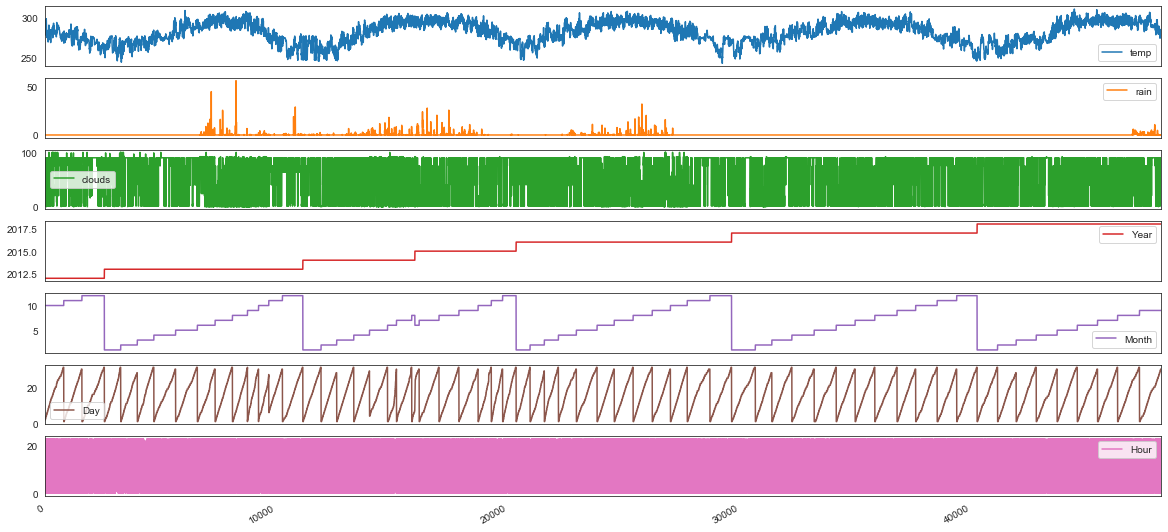

In [31]:
# Generate plots
X_nume2.plot(subplots=True, figsize=(20, 10))
plt.show()

Take a better look at the distribution of the values using histograms

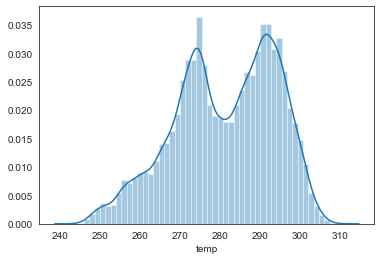

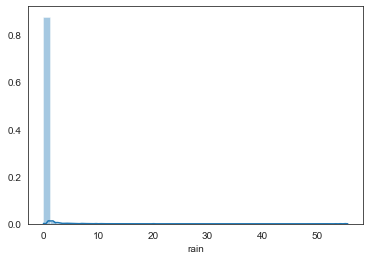

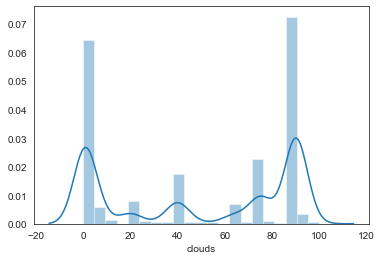

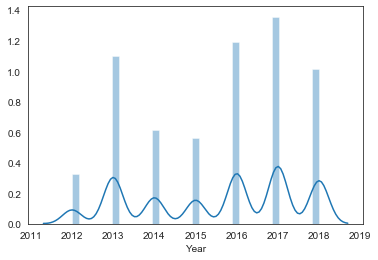

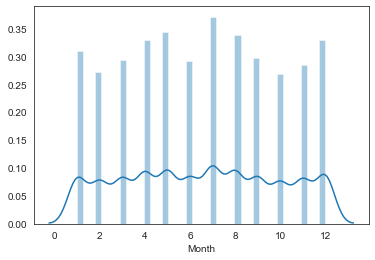

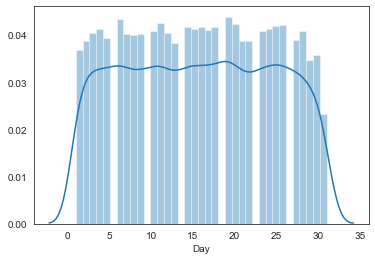

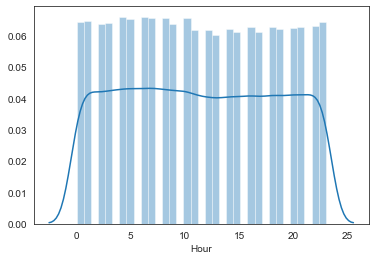

In [32]:
for i, col in enumerate(X_nume2.columns):
    plt.figure(i)
    sns.distplot(X_nume2[col])

Take an initial glimpse at the correlation among the numerical independent variables



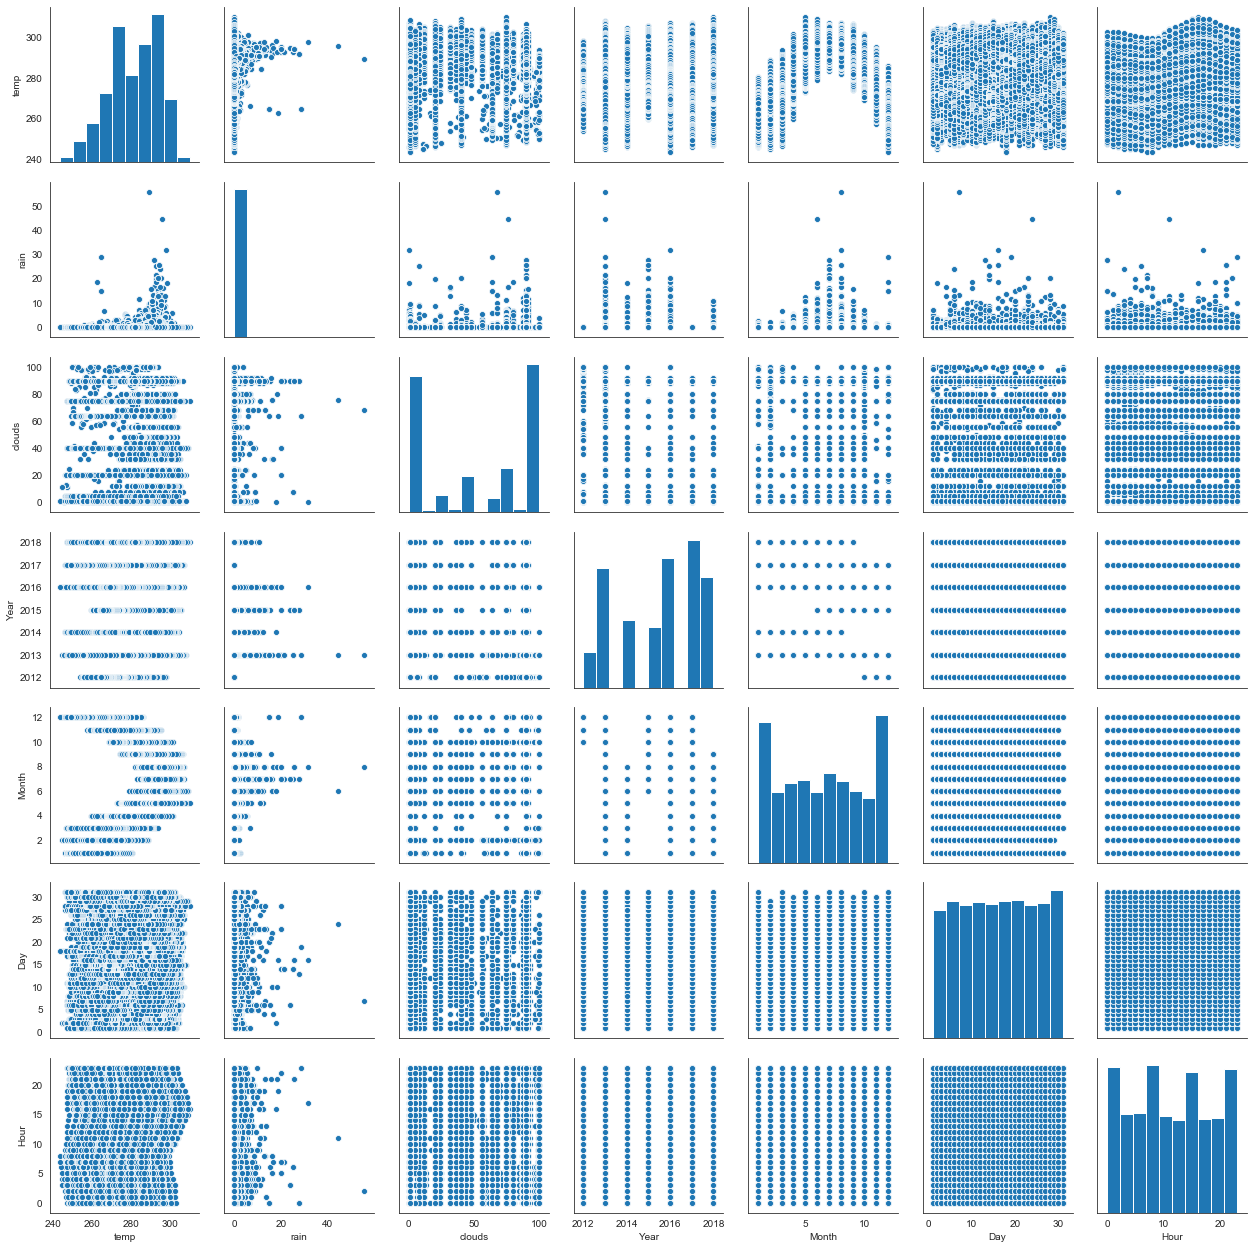

In [33]:
 # Generate pairplot
sns.pairplot(X_nume2)
plt.show()

Rain seems to be skew towards the left/zero value across all other numerical variables. 
Keep an eye on it as you keep exploring your data.

Look at the correlation matrix and values of the numerical independent variables.

Heatmaps are a great way to get a quick visual read on a big correlation matrix.

Try to match the correlation numbers to the scatterplots above to get a 
sense of what each magnitude of correlation can look like.






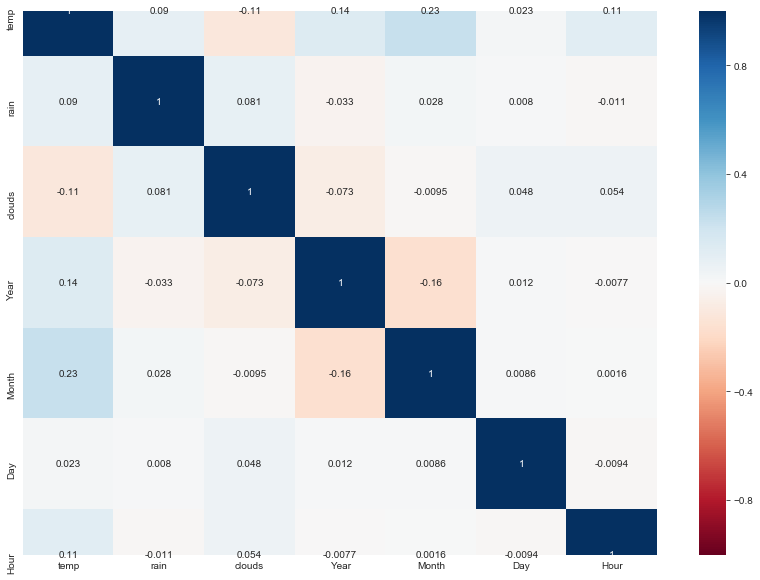

In [34]:
# Make the correlation matrix.
corrmat = X_nume2.corr()
#print(corrmat)

# Draw the heatmap using seaborn.
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrmat, square=True, cmap='RdBu', annot=True, vmin=-1, vmax=1)
plt.show()

The heat map above shows no correlation values are greater than 0.5

Keep all variables for now

Explore some of the variables across the date_time data

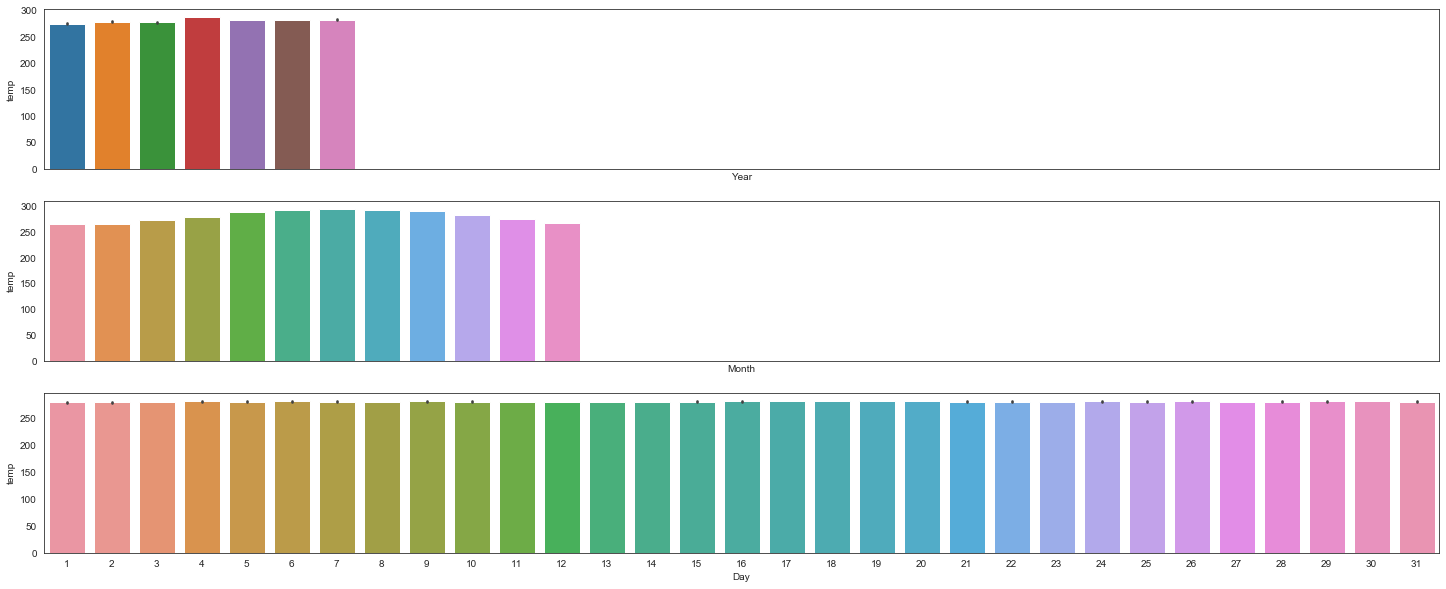

In [35]:
# Datetime data
fig, ax = plt.subplots(3, 1, figsize=(25, 10), sharex=True)
sns.barplot(x='Year', y='temp', data=X_nume2, ax=ax[0])
sns.barplot(x="Month", y='temp',  data=X_nume2, ax=ax[1])
sns.barplot(x='Day', y='temp', data=X_nume2, ax=ax[2])
plt.show()

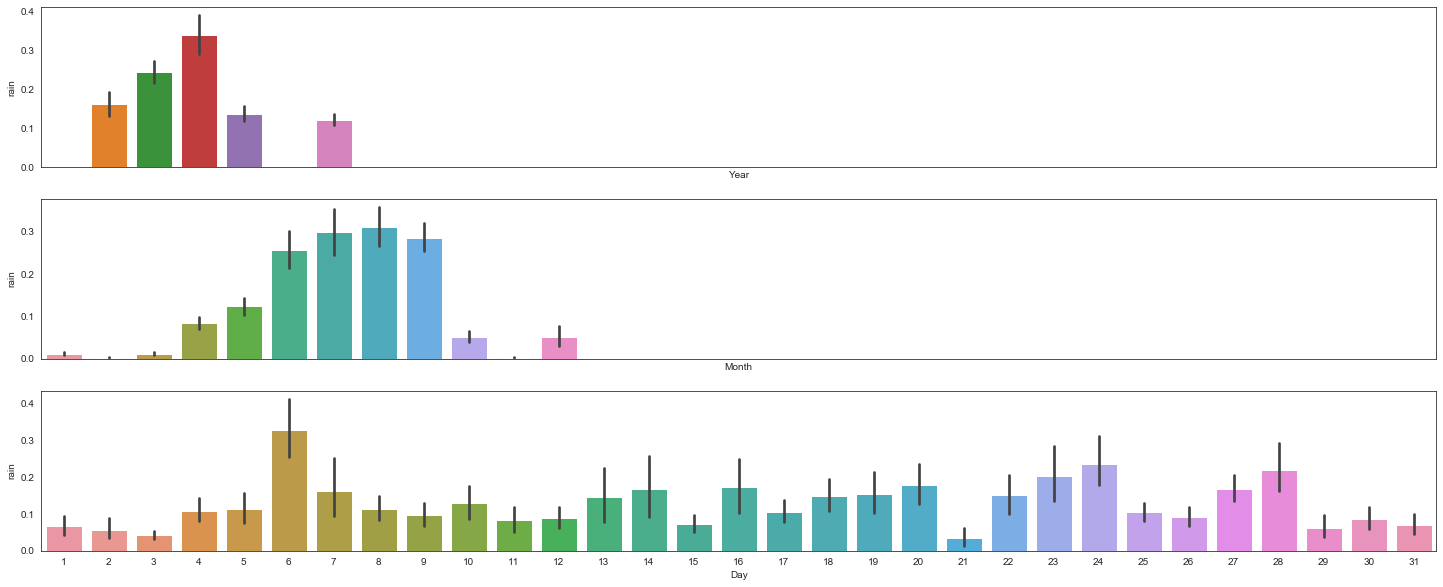

In [36]:
# Datetime data
fig, ax = plt.subplots(3, 1, figsize=(25, 10), sharex=True)
sns.barplot(x='Year', y='rain', data=X_nume2, ax=ax[0])
sns.barplot(x="Month", y='rain',  data=X_nume2, ax=ax[1])
sns.barplot(x='Day', y='rain', data=X_nume2, ax=ax[2])
plt.show()

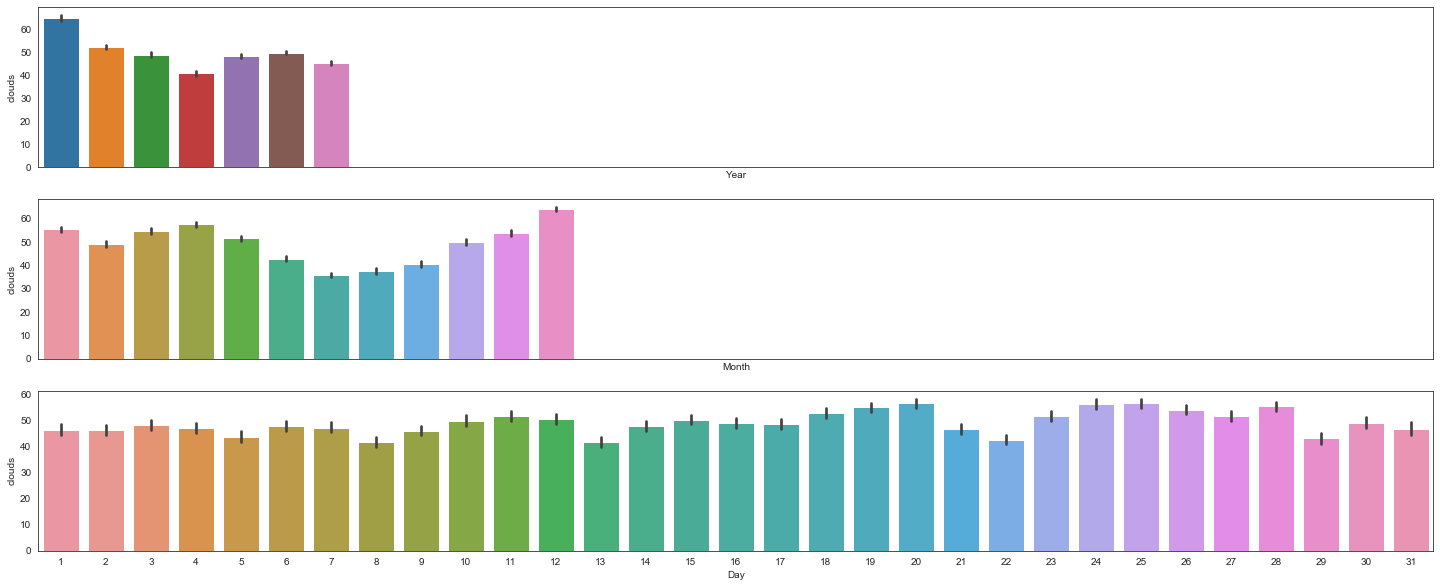

In [37]:
# Datetime data
fig, ax = plt.subplots(3, 1, figsize=(25, 10), sharex=True)
sns.barplot(x='Year', y='clouds', data=X_nume2, ax=ax[0])
sns.barplot(x="Month", y='clouds',  data=X_nume2, ax=ax[1])
sns.barplot(x='Day', y='clouds', data=X_nume2, ax=ax[2])
plt.show()

The plots above show temperature and clouds having a more highlited seasonality than rain data

In [38]:
df_final = pd.concat([X_cate, X_nume], axis=1, join='inner')
df_final.tail()
#df_final.shape

,holiday,weather,temp,rain,clouds,Target,Year,Month,Day,Hour
48199,Regular,Clouds,283.45,0.0,75,3543,2018,9,30,19
48200,Regular,Clouds,282.76,0.0,90,2781,2018,9,30,20
48201,Regular,Thunderstorm,282.73,0.0,90,2159,2018,9,30,21
48202,Regular,Clouds,282.09,0.0,90,1450,2018,9,30,22
48203,Regular,Clouds,282.12,0.0,90,954,2018,9,30,23


In [39]:
df_final = df_final[(df_final.temp != 0) & (df_final.rain < 9000)]
df_final.shape

(48193, 10)

In [40]:
df_final.drop("Target", axis=1, inplace=True)
df_final.head();

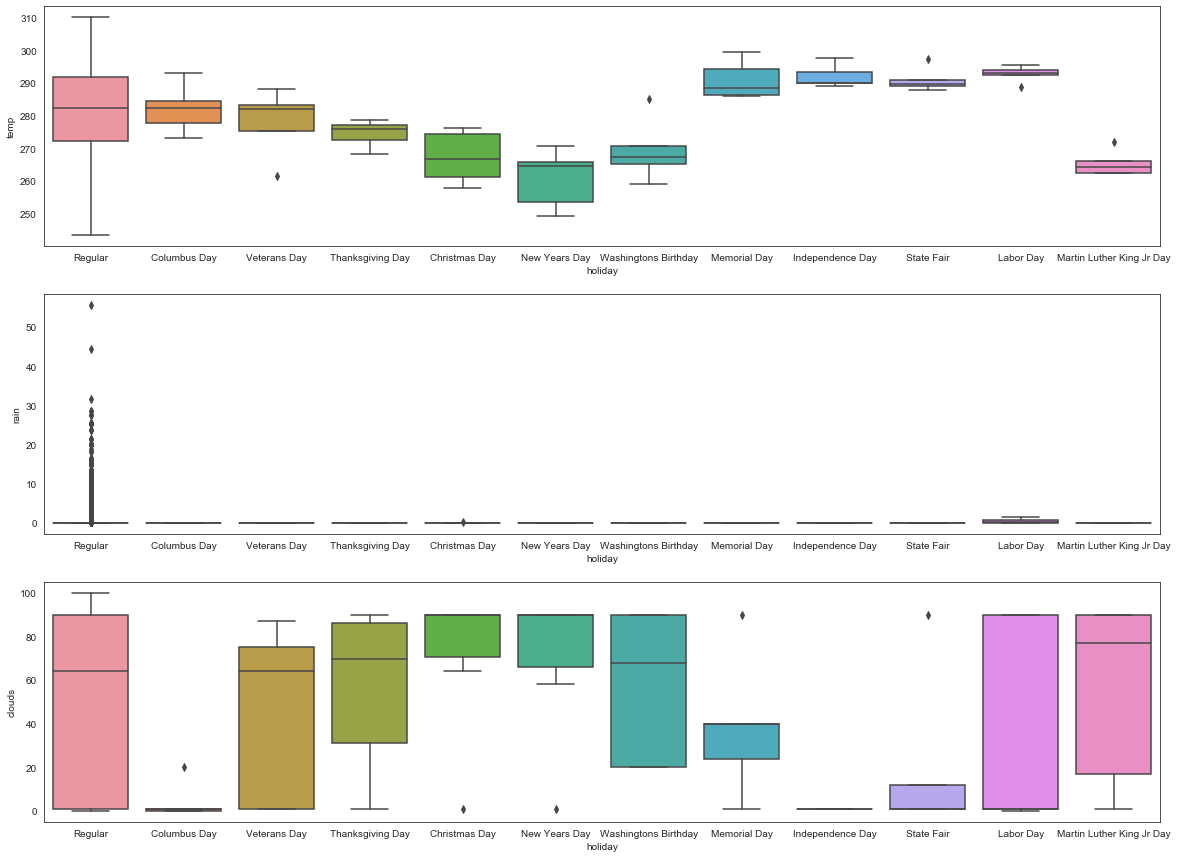

In [41]:
# visualizing correlation of holidays and independent variables
fig, ax = plt.subplots(3, 1, figsize=(20, 15))
sns.boxplot(x="holiday", y="temp", data=df_final, ax=ax[0])
sns.boxplot(x="holiday", y="rain", data=df_final, ax=ax[1])
sns.boxplot(x="holiday", y="clouds", data=df_final, ax=ax[2])
plt.show()

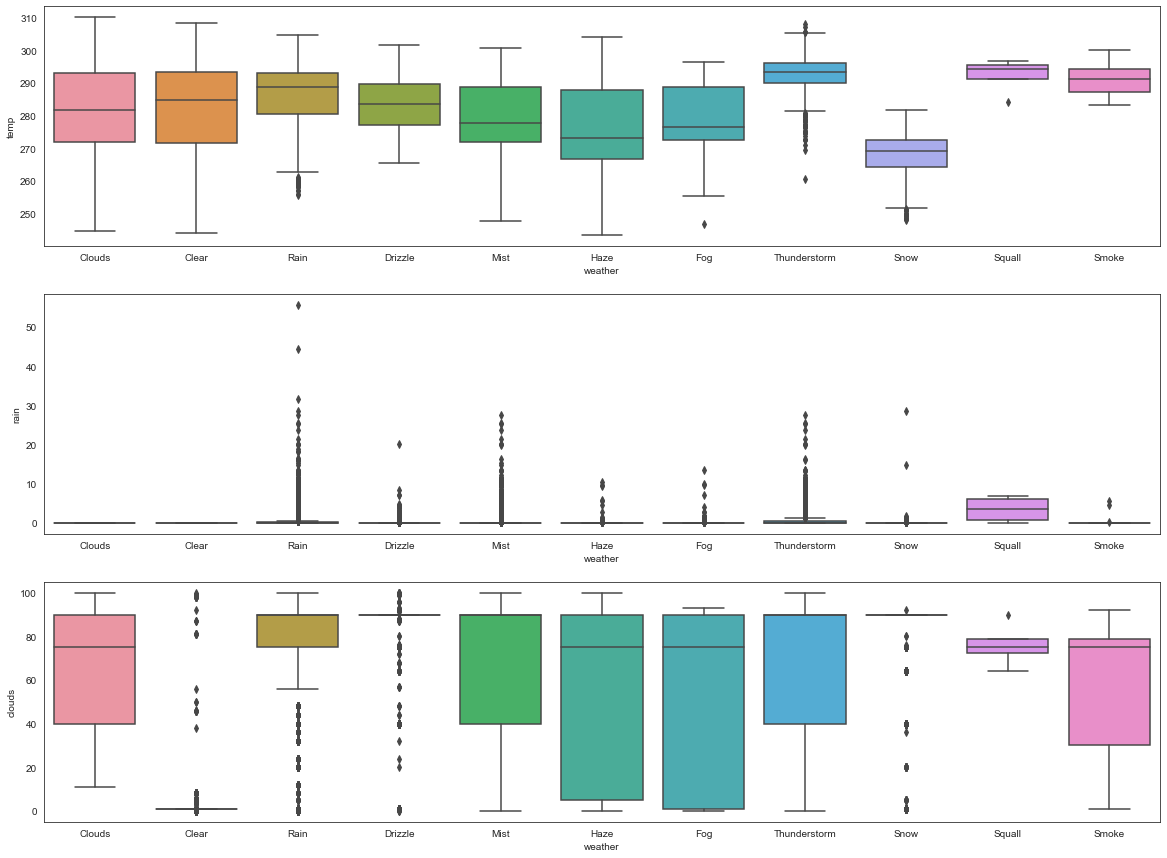

In [42]:
# visualizing correlation of weather and independent variables
fig, ax = plt.subplots(3, 1, figsize=(20, 15))
sns.boxplot(x="weather", y="temp", data=df_final, ax=ax[0])
sns.boxplot(x="weather", y="rain", data=df_final, ax=ax[1])
sns.boxplot(x="weather", y="clouds", data=df_final, ax=ax[2])
plt.show()

In [43]:
df_final['holiday'].describe()

count       48193
unique         12
top       Regular
freq        48132
Name: holiday, dtype: object

In [44]:
groupByCatego = df_final.iloc[:, 0:5]
groupByCatego.head()

,holiday,weather,temp,rain,clouds
0,Regular,Clouds,288.28,0.0,40
1,Regular,Clouds,289.36,0.0,75
2,Regular,Clouds,289.58,0.0,90
3,Regular,Clouds,290.13,0.0,90
4,Regular,Clouds,291.14,0.0,75


In [45]:
groupByCatego.groupby('holiday').describe().head()

temp                                          \
                          count        mean       std     min       25%   
holiday                                                                   
Christmas Day               6.0  267.295000  7.798079  257.95  261.2275   
Columbus Day                5.0  282.156200  7.519706  273.08  277.7200   
Independence Day            5.0  292.038000  3.482538  289.20  289.9500   
Labor Day                   7.0  292.934286  2.199158  288.78  292.4300   
Martin Luther King Jr Day   6.0  265.261667  3.638156  262.54  262.5400   

                                                      rain            ...  \
                               50%       75%     max count      mean  ...   
holiday                                                               ...   
Christmas Day              266.745  274.3325  276.08   6.0  0.041667  ...   
Columbus Day               282.341  284.6200  293.02   5.0  0.000000  ...   
Independence Day           290.080  293.4100  297.55   5.0  0.000000  ...   
Labor Day                  293.170  294.0950  295.54   7.0  0.505714  ...   
Martin Luther King Jr Day  264.310  266.0800  271.79   6.0  0.000000  ...   

                                       clouds                             \
                             75%   max  count       mean        std  min   
holiday                                                                    
Christmas Day              0.000  0.25    6.0  70.833333  35.757051  1.0   
Columbus Day               0.000  0.00    5.0   4.400000   8.734987  0.0   
Independence Day           0.000  0.00    5.0   1.000000   0.000000  1.0   
Labor Day                  0.885  1.52    7.0  39.000000  47.707442  0.0   
Martin Luther King Jr Day  0.000  0.00    6.0  56.000000  43.776706  1.0   

                                                    
                             25%   50%   75%   max  
holiday                                             
Christmas Day              70.50  90.0  90.0  90.0  
Columbus Day                0.00   1.0   1.0  20.0  
Independence Day            1.00   1.0   1.0   1.0  
Labor Day                   1.00   1.0  90.0  90.0  
Martin Luther King Jr Day  16.75  77.0  90.0  90.0  

[5 rows x 24 columns]

In [46]:
groupByCatego.groupby('weather').describe().head()

temp                                                              \
           count        mean        std     min       25%      50%       75%   
weather                                                                        
Clear    13381.0  281.700337  14.347228  244.22  271.4900  284.890  293.3100   
Clouds   15164.0  281.466101  13.148194  244.82  271.7875  281.690  292.9500   
Drizzle   1821.0  283.795431   6.929380  265.49  277.0200  283.500  289.7900   
Fog        912.0  279.415713   9.327352  246.74  272.4100  276.615  288.6125   
Haze      1360.0  275.818581  12.978824  243.39  266.6800  273.020  287.8475   

                    rain            ...               clouds             \
            max    count      mean  ...  75%    max    count       mean   
weather                             ...                                   
Clear    308.43  13381.0  0.000000  ...  0.0   0.00  13381.0   1.547866   
Clouds   310.07  15164.0  0.000000  ...  0.0   0.00  15164.0  64.056120   
Drizzle  301.49   1821.0  0.157512  ...  0.0  20.07   1821.0  82.319605   
Fog      296.52    912.0  0.087007  ...  0.0  13.46    912.0  51.497807   
Haze     303.93   1360.0  0.046868  ...  0.0  10.60   1360.0  58.670588   

                                                   
               std   min   25%   50%   75%    max  
weather                                            
Clear     4.946021   0.0   1.0   1.0   1.0  100.0  
Clouds   25.529395  11.0  40.0  75.0  90.0  100.0  
Drizzle  20.807622   0.0  90.0  90.0  90.0  100.0  
Fog      40.967176   0.0   1.0  75.0  90.0   93.0  
Haze     37.815948   0.0   5.0  75.0  90.0  100.0  

[5 rows x 24 columns]

In [47]:
encoded_data = pd.get_dummies(df_final)
encoded_data.head()

,temp,rain,clouds,Year,Month,Day,Hour,holiday_Christmas Day,holiday_Columbus Day,holiday_Independence Day,...,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,weather_Mist,weather_Rain,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm
0,288.28,0.0,40,2012,10,2,9,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,289.36,0.0,75,2012,10,2,10,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,289.58,0.0,90,2012,10,2,11,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,290.13,0.0,90,2012,10,2,12,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,291.14,0.0,75,2012,10,2,13,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [48]:
encoded_data.shape

(48193, 30)

In [49]:
encoded_data['holiday_Regular'].value_counts()

1    48132
0       61
Name: holiday_Regular, dtype: int64

In [50]:
encoded_data.columns

Index(['temp', 'rain', 'clouds', 'Year', 'Month', 'Day', 'Hour',
       'holiday_Christmas Day', 'holiday_Columbus Day',
       'holiday_Independence Day', 'holiday_Labor Day',
       'holiday_Martin Luther King Jr Day', 'holiday_Memorial Day',
       'holiday_New Years Day', 'holiday_Regular', 'holiday_State Fair',
       'holiday_Thanksgiving Day', 'holiday_Veterans Day',
       'holiday_Washingtons Birthday', 'weather_Clear', 'weather_Clouds',
       'weather_Drizzle', 'weather_Fog', 'weather_Haze', 'weather_Mist',
       'weather_Rain', 'weather_Smoke', 'weather_Snow', 'weather_Squall',
       'weather_Thunderstorm'],
      dtype='object')

In [51]:
weather_binary = encoded_data.loc[:,'weather_Clear':'weather_Thunderstorm']
weather_binary.head()

,weather_Clear,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,weather_Mist,weather_Rain,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm
0,0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0


In [52]:
encoded_data['holiday_Regular'].value_counts()

1    48132
0       61
Name: holiday_Regular, dtype: int64

In [53]:
weather_corr = weather_binary.corr()
weather_corr.head()

,weather_Clear,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,weather_Mist,weather_Rain,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm
weather_Clear,1.000000,-0.420087,-0.122859,-0.086106,-0.105651,-0.232681,-0.226414,-0.012633,-0.156187,-0.005649,-0.091803
weather_Clouds,-0.420087,1.000000,-0.134272,-0.094105,-0.115466,-0.254296,-0.247447,-0.013806,-0.170696,-0.006173,-0.100331
weather_Drizzle,-0.122859,-0.134272,1.000000,-0.027522,-0.033769,-0.074372,-0.072369,-0.004038,-0.049922,-0.001805,-0.029343
weather_Fog,-0.086106,-0.094105,-0.027522,1.000000,-0.023667,-0.052124,-0.050720,-0.002830,-0.034988,-0.001265,-0.020565
weather_Haze,-0.105651,-0.115466,-0.033769,-0.023667,1.000000,-0.063955,-0.062232,-0.003472,-0.042930,-0.001553,-0.025233


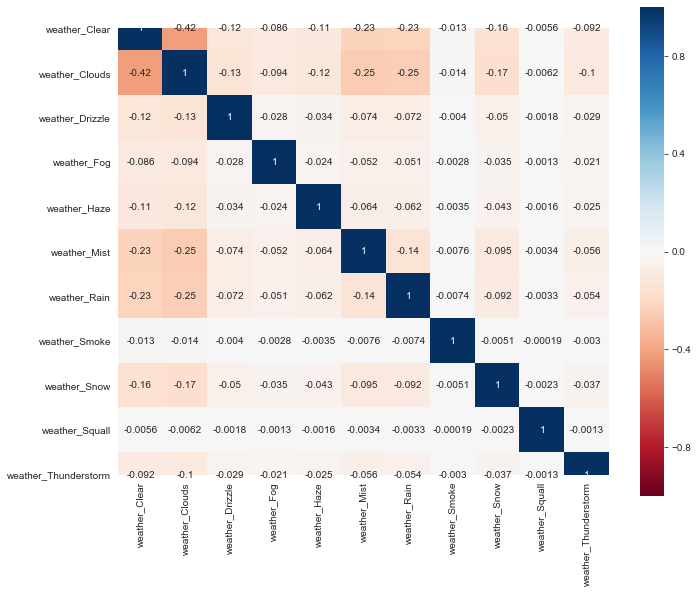

In [54]:
# Draw the heatmap using seaborn.
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(weather_corr, square=True, cmap='RdBu', annot=True, vmin=-1, vmax=1)
plt.show()

In [55]:
holi_binary = encoded_data.loc[:,'holiday_Christmas Day':'holiday_Washingtons Birthday']
holi_binary.head()

,holiday_Christmas Day,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,holiday_New Years Day,holiday_Regular,holiday_State Fair,holiday_Thanksgiving Day,holiday_Veterans Day,holiday_Washingtons Birthday
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0


In [56]:
holi_corr = weather_binary.corr();

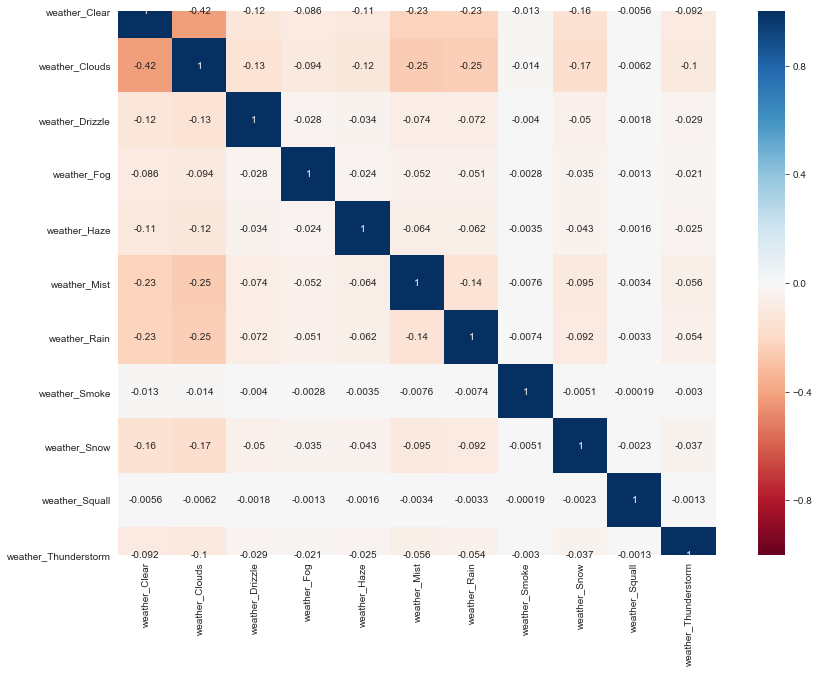

In [57]:
# Draw the heatmap using seaborn.
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(holi_corr, square=True, cmap='RdBu', annot=True, vmin=-1, vmax=1)
plt.show()

In [58]:
encoded_data.columns

Index(['temp', 'rain', 'clouds', 'Year', 'Month', 'Day', 'Hour',
       'holiday_Christmas Day', 'holiday_Columbus Day',
       'holiday_Independence Day', 'holiday_Labor Day',
       'holiday_Martin Luther King Jr Day', 'holiday_Memorial Day',
       'holiday_New Years Day', 'holiday_Regular', 'holiday_State Fair',
       'holiday_Thanksgiving Day', 'holiday_Veterans Day',
       'holiday_Washingtons Birthday', 'weather_Clear', 'weather_Clouds',
       'weather_Drizzle', 'weather_Fog', 'weather_Haze', 'weather_Mist',
       'weather_Rain', 'weather_Smoke', 'weather_Snow', 'weather_Squall',
       'weather_Thunderstorm'],
      dtype='object')

In [59]:
encoded_data.drop(['rain','holiday_Regular'], axis=1, inplace=True);

In [60]:
X = encoded_data
X.columns

Index(['temp', 'clouds', 'Year', 'Month', 'Day', 'Hour',
       'holiday_Christmas Day', 'holiday_Columbus Day',
       'holiday_Independence Day', 'holiday_Labor Day',
       'holiday_Martin Luther King Jr Day', 'holiday_Memorial Day',
       'holiday_New Years Day', 'holiday_State Fair',
       'holiday_Thanksgiving Day', 'holiday_Veterans Day',
       'holiday_Washingtons Birthday', 'weather_Clear', 'weather_Clouds',
       'weather_Drizzle', 'weather_Fog', 'weather_Haze', 'weather_Mist',
       'weather_Rain', 'weather_Smoke', 'weather_Snow', 'weather_Squall',
       'weather_Thunderstorm'],
      dtype='object')

In [61]:
X.rename({
    'holiday_Christmas Day': 'Christmas', 'holiday_Columbus Day': 'Columbus',
    'holiday_Independence Day': 'Independence','holiday_Labor Day': 'Labor',
    'holiday_Martin Luther King Jr Day':'MLKingJr','holiday_Memorial Day': 'Memorial',
    'holiday_New Years Day':'NewYears', 'holiday_State Fair':'StateFair',
    'holiday_Thanksgiving Day': 'Thanksgiving', 'holiday_Veterans Day': 'Veterans',
    'holiday_Washingtons Birthday': 'Washington','weather_Clear': 'Clear', 
    'weather_Clouds': 'Clouds','weather_Drizzle' :'Drizzle', 
    'weather_Fog': 'Fog', 'weather_Haze': 'Haze', 'weather_Mist': 'Mist',
    'weather_Rain': 'Rain','weather_Smoke': 'Smoke', 'weather_Snow': 'Snow', 
    'weather_Squall': 'Squall','weather_Thunderstorm': 'Thunderstorm'}, axis=1, inplace=True)

In [62]:
X.columns

Index(['temp', 'clouds', 'Year', 'Month', 'Day', 'Hour', 'Christmas',
       'Columbus', 'Independence', 'Labor', 'MLKingJr', 'Memorial', 'NewYears',
       'StateFair', 'Thanksgiving', 'Veterans', 'Washington', 'Clear',
       'Clouds', 'Drizzle', 'Fog', 'Haze', 'Mist', 'Rain', 'Smoke', 'Snow',
       'Squall', 'Thunderstorm'],
      dtype='object')

In [63]:
X.dtypes

temp            float64
clouds            int64
Year              int64
Month             int64
Day               int64
Hour              int64
Christmas         uint8
Columbus          uint8
Independence      uint8
Labor             uint8
MLKingJr          uint8
Memorial          uint8
NewYears          uint8
StateFair         uint8
Thanksgiving      uint8
Veterans          uint8
Washington        uint8
Clear             uint8
Clouds            uint8
Drizzle           uint8
Fog               uint8
Haze              uint8
Mist              uint8
Rain              uint8
Smoke             uint8
Snow              uint8
Squall            uint8
Thunderstorm      uint8
dtype: object

# Filter Methods
followed the methods presented here
https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

##  - Pearson Correlation

In [64]:
# concatenate independent variable with target temporarilly for Pearson's correlations
temp_df = pd.concat([X, Y], axis=1)
temp_df.head()
temp_corr = temp_df.corr()

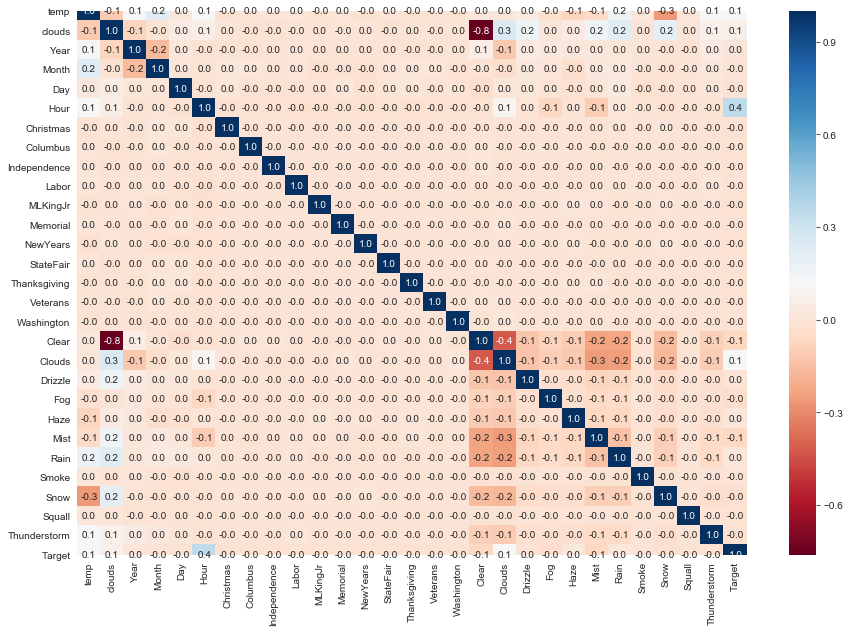

In [65]:
# Draw the heatmap using seaborn.
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(temp_corr, cmap='RdBu', annot=True, fmt='.1f')
plt.show()

In [66]:
# Check correlation values with output variable
cor_target = abs(temp_corr["Target"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target > 0.5]
relevant_features


Target    1.0
Name: Target, dtype: float64

In [67]:
# clear and clouds seem to have a high correlation value among them
print(temp_df[["Clear", "clouds"]].corr())

# Its -0.76, drop one variable. 

           Clear    clouds
Clear   1.000000 -0.760003
clouds -0.760003  1.000000


In [68]:
print(temp_df[["Clear", "Target"]].corr())
print(temp_df[["clouds", "Target"]].corr())

# drop Clear since it has a slightly lower correlation with target

           Clear    Target
Clear   1.000000 -0.063338
Target -0.063338  1.000000
          clouds    Target
clouds  1.000000  0.066804
Target  0.066804  1.000000


In [69]:
X.drop("Clear", axis=1, inplace=True);

## Wrapper Method

The Wrapper method needs machine learning algoriths to perform evaluation criteria. You feed the features to the algorith and add/remove based on the output. This is why wrappers are computationally expensive.

## - Backward Elimination

    As the name suggests, we add the features to the model, check the performance, and iteratively remove the 
    worst performing features, one by one. In this case the features are run through the Ordinary Least Square 
    Model and a treshold of pvalue > 0.05

In [71]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X) # Data of variables w/out target

# Fitting sm.OLS model
model = sm.OLS(Y, X_1).fit()
model.pvalues

/Users/nataliaagudelo/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const            6.006558e-01
temp            1.213870e-121
clouds           5.778401e-13
Year             8.270614e-01
Month            1.293778e-07
Day              2.411775e-02
Hour             0.000000e+00
Christmas        1.707373e-01
Columbus         6.358075e-02
Independence     1.746383e-01
Labor            7.473846e-02
MLKingJr         5.056350e-02
Memorial         9.593630e-02
NewYears         3.316771e-01
StateFair        5.206986e-02
Thanksgiving     1.513506e-01
Veterans         8.221601e-02
Washington       5.528512e-02
Clouds           6.740761e-22
Drizzle          7.378148e-01
Fog              4.270399e-02
Haze             2.520578e-11
Mist             3.219297e-02
Rain             3.041713e-01
Smoke            8.070400e-01
Snow             7.950675e-01
Squall           1.744786e-01
Thunderstorm     3.334313e-10
dtype: float64

In this case Year would be dropped and the features would iterate again. 
Use a loop to iterate several times until finished.


In [72]:
# Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(Y, X_1).fit()
    p = pd.Series(model.pvalues.values[1:], index=cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if (pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
            
selected_features = cols
print(selected_features)

['temp', 'clouds', 'Month', 'Day', 'Hour', 'Clouds', 'Haze', 'Mist', 'Thunderstorm']


We are left with 9 features!

##  - RFE (Recursive Feature Elimination)
This methods works by recursively removing attributes and building a model on the attributes that remain. It ranks the features based on importance.

It feed the model the number of features required, it gives the ranking and support, True for relevant and False for irrelevant features. 

Check how many are the optimum number of features for which the accuracy of model is the highest

In [73]:
# Number of features
num_feat_list = np.arange(1,27)
high_score = 0

# Variable to store optimum features
opt_feat = 0
score_list = []

for n in range(len(num_feat_list)):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.3, random_state = 0)
    
    model = LinearRegression()
    
    rfe = RFE(model, num_feat_list[n])
    
    X_train_rfe = rfe.fit_transform(X_train, Y_train)
    
    X_test_rfe = rfe.transform(X_test)
    
    model.fit(X_train_rfe, Y_train)
    
    score = model.score(X_test_rfe, Y_test)
    
    score_list.append(score)
    
    if (score > high_score):
        high_score = score
        opt_feat = num_feat_list[n]
        
print ("Optimum number of features: %d" %opt_feat)
print ("Score with %d features: %f" % (opt_feat, high_score))

Optimum number of features: 26
Score with 26 features: 0.144051


In [74]:
model = LinearRegression()

# Initializing RFE model
rfe = RFE(model, 26 )

# Transforming data using RFE
X_rfe = rfe.fit_transform(X, Y)

# Fitting the data to the model
model.fit(X_rfe, Y)

print(rfe.support_)
print(rfe.ranking_)


[ True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
[1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## Embeded Methods



In [75]:
reg = LassoCV()
reg.fit(X, Y)

print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,Y))

coef = pd.Series(reg.coef_, index = X.columns)

/Users/nataliaagudelo/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 5.177910
Best score using built-in LassoCV: 0.143564


In [76]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 9 variables and eliminated the other 18 variables


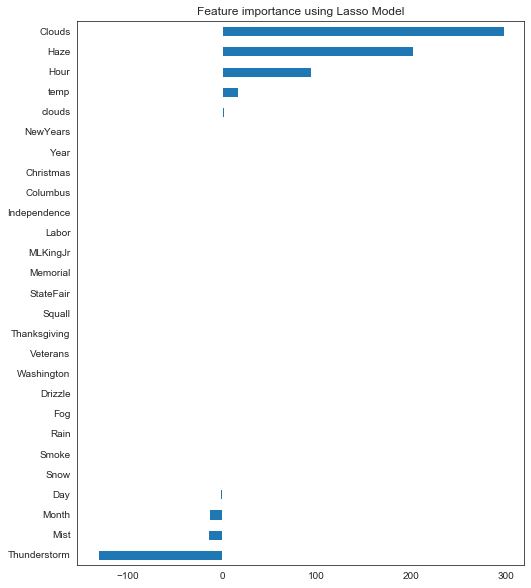

In [85]:
imp_coef = coef.sort_values()

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
plt.show()

All the filter methods agree in nine features:

Temperature
Clouds percentage
Month
Day
Hour
Clouds
Haze
Mist
Thunderstorms

However the Lasso Embeded Methods shows the features in order of importance.


Therefore, the 5 components selected for a supervise model would be:

Cloud percentage cover
Haze
thunderstorm
Hours
Temperature and/or Mist


## PCA

In [77]:
# Normalize the data so that all variables have a mean of 0 and standard deviation of 1.
scaler = MinMaxScaler(feature_range=[0,1])
X = scaler.fit_transform(X)
X;

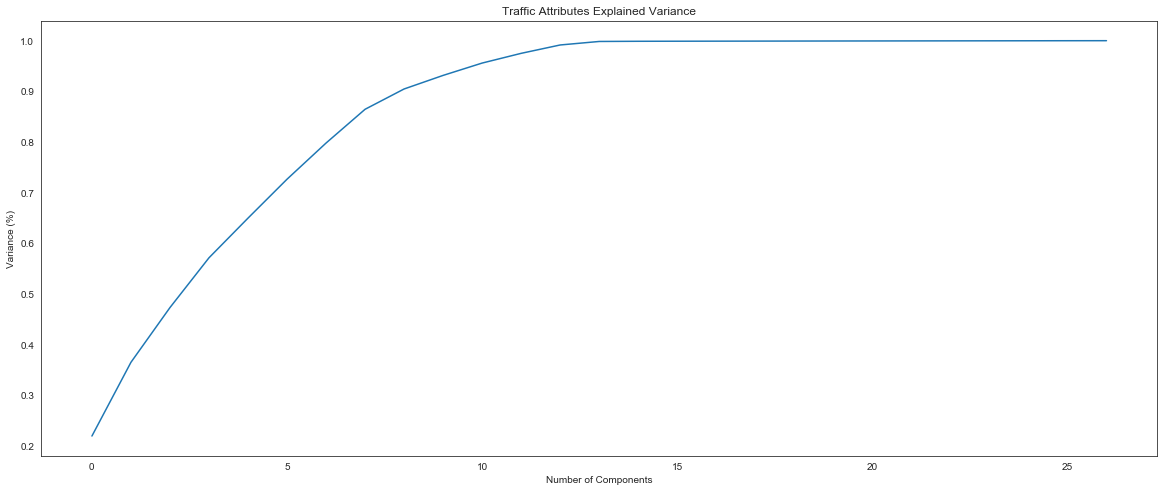

In [78]:
# Fitting the PCA algorith with the data
pca = PCA().fit(X)

# Plot the cumulative sumation fo the explained variance
plt.figure(figsize=(20,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') # for each component
plt.title('Traffic Attributes Explained Variance')
plt.show()

In [80]:
# Run PCA to get 95% of...
sklearn_pca = PCA(n_components=11)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    np.cumsum(sklearn_pca.explained_variance_ratio_))

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.22030435 0.36571149 0.47366421 0.57184104 0.65008329 0.72681542
 0.79814446 0.86472031 0.90475925 0.93154166 0.95586994]
